In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import nxviz as nv
import numpy as np
import networkx as nx
from pandas import read_csv
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import operator
from pandas import DataFrame

/Users/nilsjennissen/miniforge3/envs/character-relevance-evolution/lib/python3.10/site-packages/nxviz/__init__.py:18: UserWarning: 
nxviz has a new API! Version 0.7.4 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.4, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  warnings.warn(


In [6]:
G = nx.Graph()
nodes= ["A", "B", "C", "D", "E"]
G.add_nodes_from(nodes)
print("Object type of G: ", type(G))
print("Nodes of Graph G:", G.nodes)

Object type of G:  <class 'networkx.classes.graph.Graph'>
Nodes of Graph G: ['A', 'B', 'C', 'D', 'E']


In [7]:
edges= [("A", "B"), ("A", "C"), ("B", "C"), ("C", "E"), ("B", "D"), ("D", "E")]
G.add_edges_from(edges)
print("Edges of Graph G:", G.edges)

Edges of Graph G: [('A', 'B'), ('A', 'C'), ('B', 'C'), ('B', 'D'), ('C', 'E'), ('D', 'E')]


In [8]:
G.nodes["A"]['label'] = 'Alpha'
G.nodes["A"]['description'] = 'First member of the team'
G.nodes["A"]['color'] = 'Red'
print(G.nodes(data= True))

[('A', {'label': 'Alpha', 'description': 'First member of the team', 'color': 'Red'}), ('B', {}), ('C', {}), ('D', {}), ('E', {})]


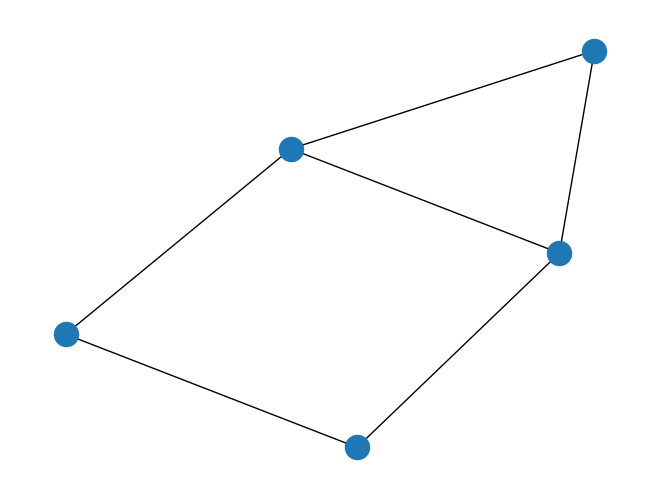

In [9]:
nx.draw(G)
plt.show()

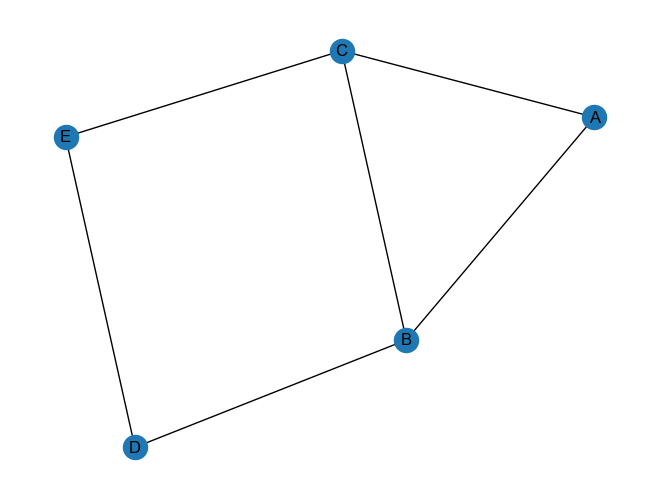

In [10]:
nx.draw(G, with_labels= True)

/Users/nilsjennissen/miniforge3/envs/character-relevance-evolution/lib/python3.10/site-packages/nxviz/api.py:275: UserWarning: As of nxviz 0.7, the object-oriented API is being deprecated in favour of a functional API. Please consider switching your plotting code! The object-oriented API wrappers remains in place to help you transition over. A few changes between the old and new API exist; please consult the nxviz documentation for more information. When the 1.0 release of nxviz happens, the object-oriented API will be dropped entirely.
  warnings.warn(


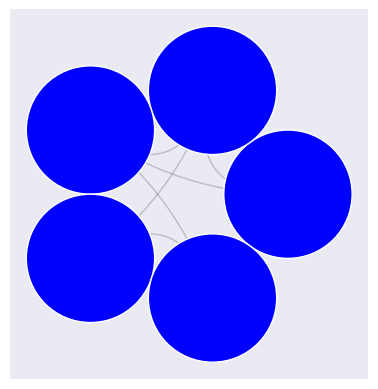

In [11]:
ap = nv.CircosPlot(G)
#ap.draw() 
plt.show()

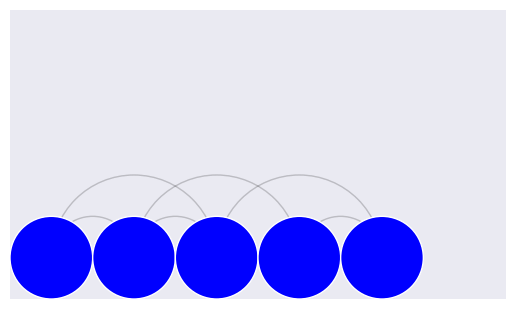

In [12]:
ap = nv.ArcPlot(G)
#ap.draw() 
plt.show()

In [13]:
nx.adjacency_matrix(G).todense()

array([[0, 1, 1, 0, 0],
       [1, 0, 1, 1, 0],
       [1, 1, 0, 0, 1],
       [0, 1, 0, 0, 1],
       [0, 0, 1, 1, 0]])

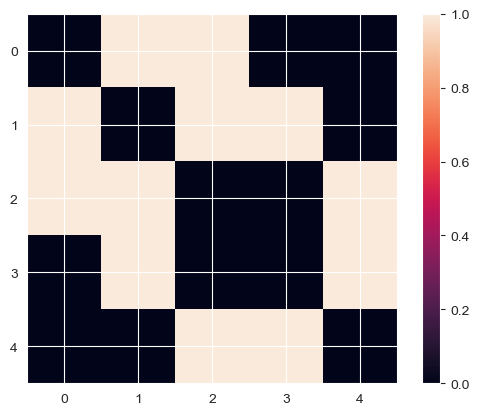

In [14]:
plt.imshow(nx.adjacency_matrix(G).todense())
plt.colorbar()
plt.show()

### Making Network of Tabular Data 

In [17]:
routes= read_csv("../data/routes.csv")
routes.head(5)

FileNotFoundError: [Errno 2] No such file or directory: '../data/routes.csv'

In [16]:
routes[routes["Codeshare"].isna()== False]

NameError: name 'routes' is not defined

In [26]:
nodes= [row["Source airport"] for item, row in routes.iterrows()]
edges= [(row["Source airport"], row["Destination airport"]) for item, row in routes.iterrows()]

In [27]:
nodes

['ASF',
 'ASF',
 'CEK',
 'CEK',
 'DME',
 'DME',
 'DME',
 'DME',
 'EGO',
 'EGO',
 'GYD',
 'KGD',
 'KZN',
 'KZN',
 'KZN',
 'KZN',
 'KZN',
 'KZN',
 'KZN',
 'LED',
 'LED',
 'LED',
 'MRV',
 'NBC',
 'NBC',
 'NBC',
 'NBC',
 'NJC',
 'NJC',
 'NUX',
 'OVB',
 'OVB',
 'SVX',
 'SVX',
 'SVX',
 'SVX',
 'SVX',
 'TGK',
 'UUA',
 'UUA',
 'UUA',
 'BTK',
 'BTK',
 'CEK',
 'HTA',
 'IKT',
 'IKT',
 'IKT',
 'IKT',
 'IKT',
 'IKT',
 'IKT',
 'IKT',
 'KCK',
 'MJZ',
 'ODO',
 'OVB',
 'OVB',
 'OVB',
 'UKX',
 'ULK',
 'YKS',
 'AYP',
 'CUZ',
 'CUZ',
 'HUU',
 'IQT',
 'IQT',
 'LIM',
 'LIM',
 'LIM',
 'LIM',
 'LIM',
 'PCL',
 'PCL',
 'PCL',
 'PEM',
 'TPP',
 'TPP',
 'TPP',
 'ABJ',
 'ABJ',
 'ACC',
 'BKO',
 'BKO',
 'BKO',
 'BOY',
 'BOY',
 'COO',
 'COO',
 'DKR',
 'DKR',
 'LFW',
 'NIM',
 'OUA',
 'OUA',
 'OUA',
 'OUA',
 'OUA',
 'OUA',
 'OUA',
 'OUA',
 'BOG',
 'BOG',
 'CLO',
 'GYE',
 'GYE',
 'GYE',
 'GYE',
 'OCC',
 'SCY',
 'UIO',
 'UIO',
 'UIO',
 'BDS',
 'BOD',
 'BRS',
 'GVA',
 'LCA',
 'LPA',
 'RMF',
 'TFS',
 'ZRH',
 'ZRH',
 'ZRH',


In [28]:
edges

[('ASF', 'KZN'),
 ('ASF', 'MRV'),
 ('CEK', 'KZN'),
 ('CEK', 'OVB'),
 ('DME', 'KZN'),
 ('DME', 'NBC'),
 ('DME', 'TGK'),
 ('DME', 'UUA'),
 ('EGO', 'KGD'),
 ('EGO', 'KZN'),
 ('GYD', 'NBC'),
 ('KGD', 'EGO'),
 ('KZN', 'AER'),
 ('KZN', 'ASF'),
 ('KZN', 'CEK'),
 ('KZN', 'DME'),
 ('KZN', 'EGO'),
 ('KZN', 'LED'),
 ('KZN', 'SVX'),
 ('LED', 'KZN'),
 ('LED', 'NBC'),
 ('LED', 'UUA'),
 ('MRV', 'ASF'),
 ('NBC', 'DME'),
 ('NBC', 'GYD'),
 ('NBC', 'LED'),
 ('NBC', 'SVX'),
 ('NJC', 'SVX'),
 ('NJC', 'UUA'),
 ('NUX', 'SVX'),
 ('OVB', 'CEK'),
 ('OVB', 'SVX'),
 ('SVX', 'KZN'),
 ('SVX', 'NBC'),
 ('SVX', 'NJC'),
 ('SVX', 'NUX'),
 ('SVX', 'OVB'),
 ('TGK', 'DME'),
 ('UUA', 'DME'),
 ('UUA', 'LED'),
 ('UUA', 'NJC'),
 ('BTK', 'IKT'),
 ('BTK', 'OVB'),
 ('CEK', 'OVB'),
 ('HTA', 'IKT'),
 ('IKT', 'BTK'),
 ('IKT', 'HTA'),
 ('IKT', 'KCK'),
 ('IKT', 'ODO'),
 ('IKT', 'OVB'),
 ('IKT', 'UKX'),
 ('IKT', 'ULK'),
 ('IKT', 'YKS'),
 ('KCK', 'IKT'),
 ('MJZ', 'OVB'),
 ('ODO', 'IKT'),
 ('OVB', 'BTK'),
 ('OVB', 'CEK'),
 ('OVB', 'IKT'

In [29]:
routes_graph= nx.Graph()
routes_graph.add_nodes_from(nodes)
routes_graph.add_edges_from(edges)

### Graph Visualisation

In [30]:
british_routes= routes[routes["Airline"]== "BA"]
nodes= [row["Source airport"] for item, row in british_routes.iterrows()]
edges= [(row["Source airport"], row["Destination airport"]) for item, row in british_routes.iterrows()]
british_routes= nx.Graph()
british_routes.add_nodes_from(nodes)
british_routes.add_edges_from(edges)

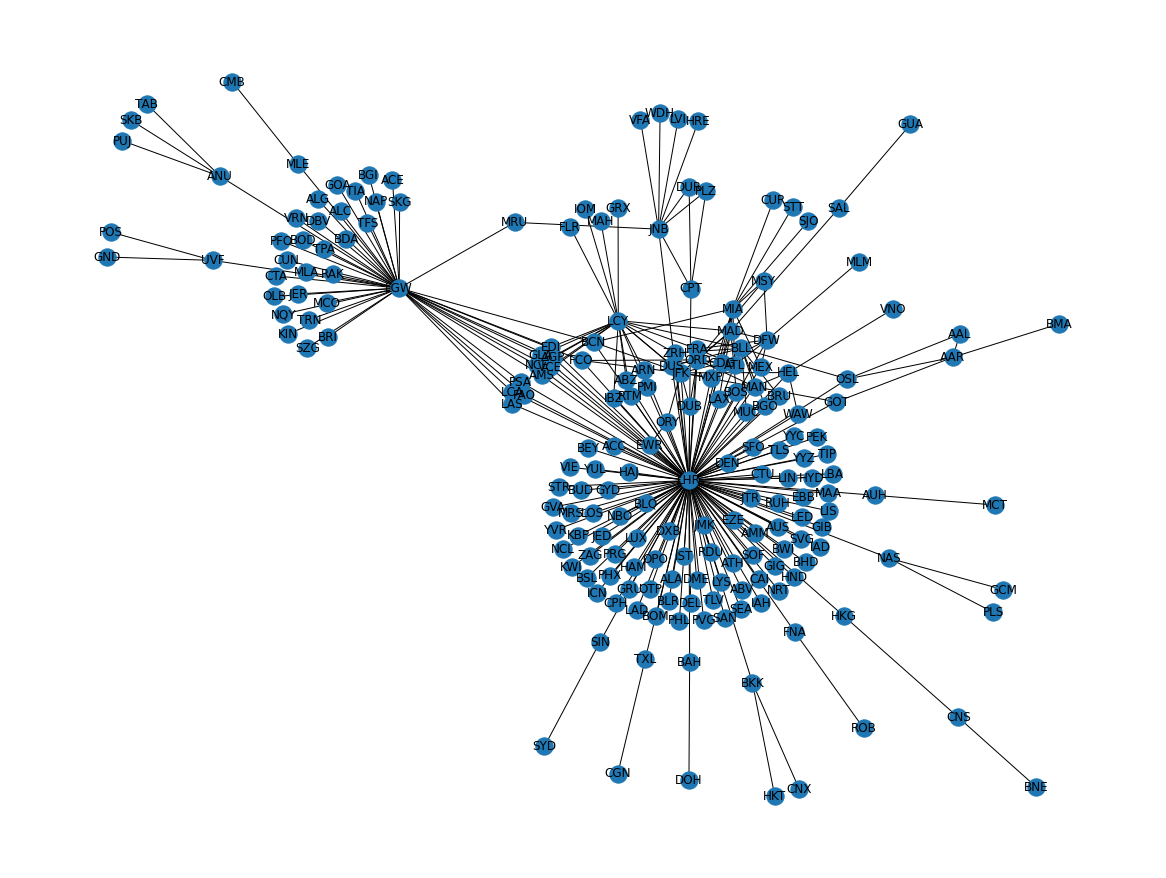

In [33]:
plt.rcParams['figure.figsize'] = (16.0, 12.0)
pos = nx.spring_layout(british_routes, iterations=200,
                      seed = 42)
nx.draw(british_routes, pos, 
        with_labels=True)
plt.show()

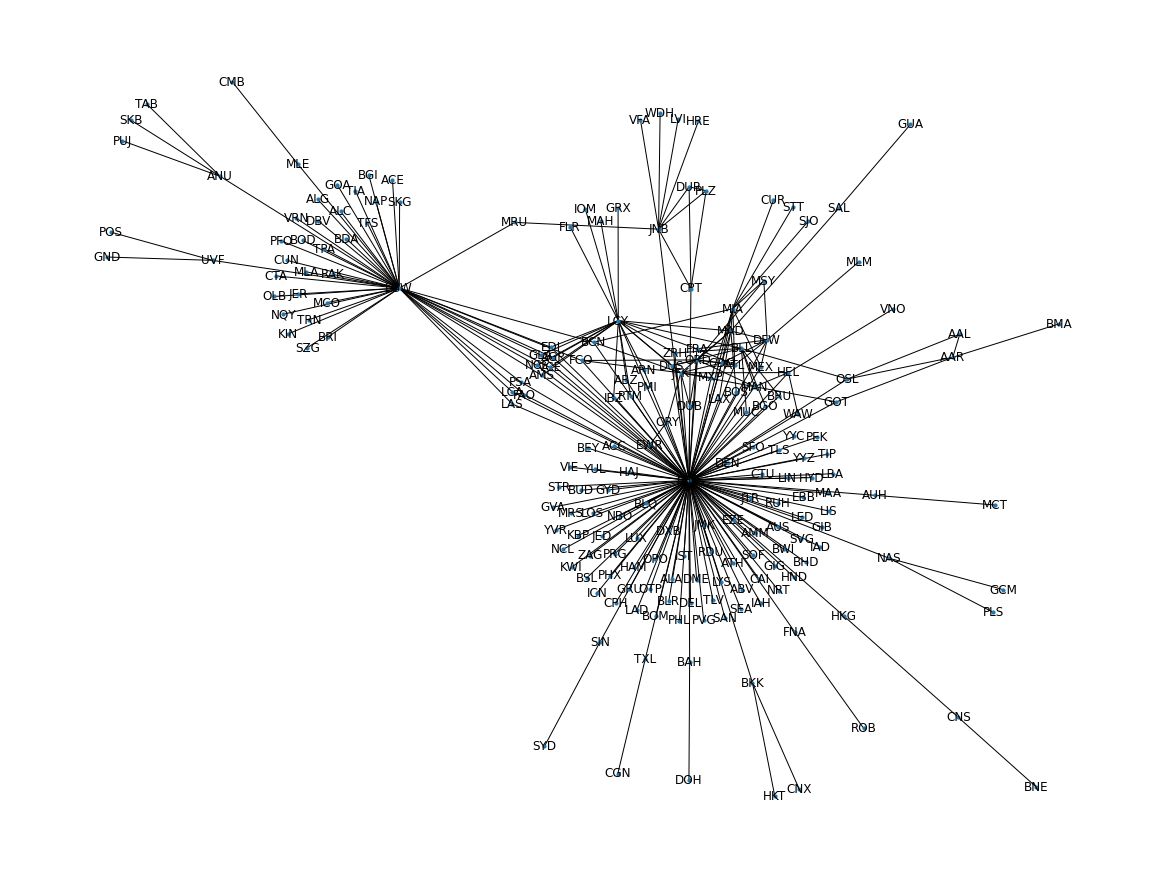

In [48]:
plt.rcParams['figure.figsize'] = (16.0, 12.0)
pos = nx.spring_layout(british_routes, iterations=200,
                      seed = 42)
nx.draw(british_routes, pos, 
        with_labels=True, node_size= 10)
plt.show()

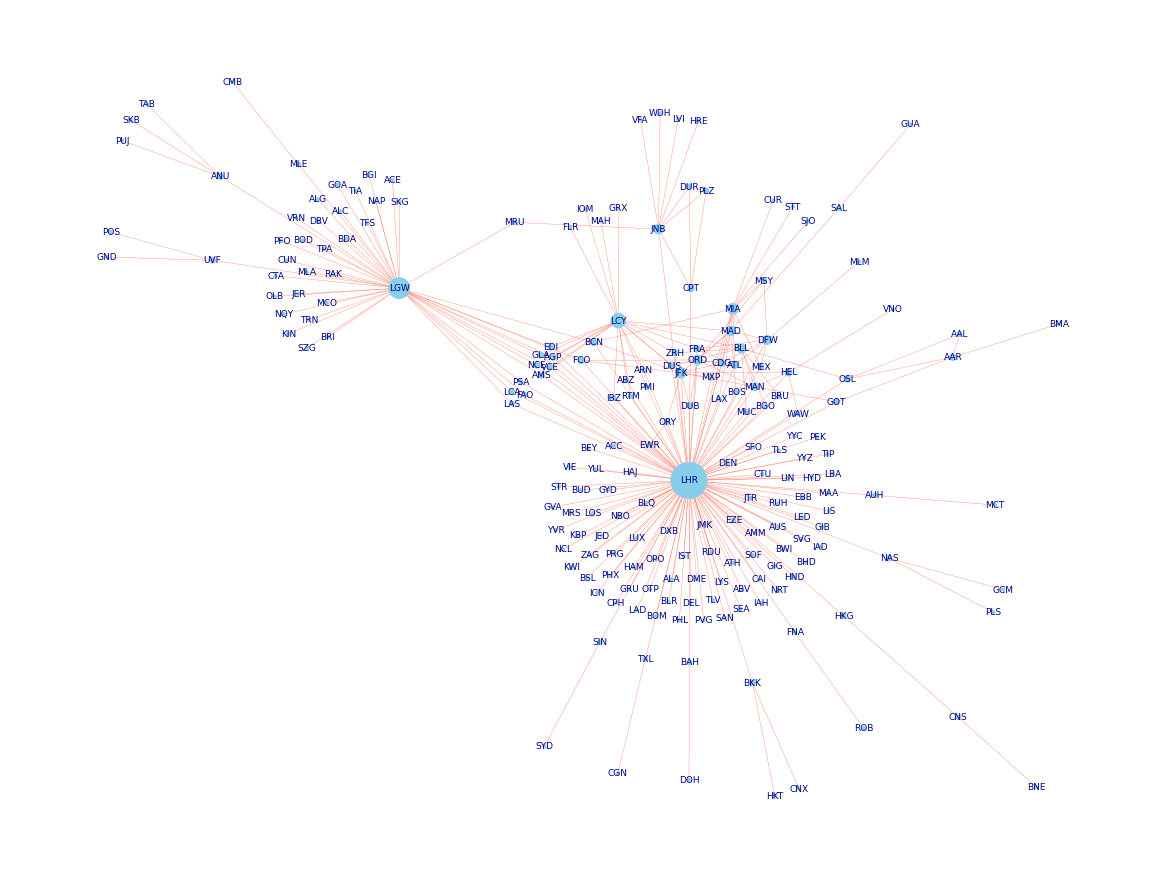

In [49]:
plt.rcParams['figure.figsize'] = (16.0, 12.0)
node_sizes= [degree[1]*10 for degree in british_routes.degree]
pos = nx.spring_layout(british_routes, iterations=200,
                      seed = 42)
nx.draw(british_routes, pos, cmap=plt.cm.pink, 
        with_labels=True,
        node_color= "skyblue",
        node_size= node_sizes, 
        edge_color= "tomato", 
        width= 0.3,
        font_size=9,
        font_color= "darkblue")
plt.show()

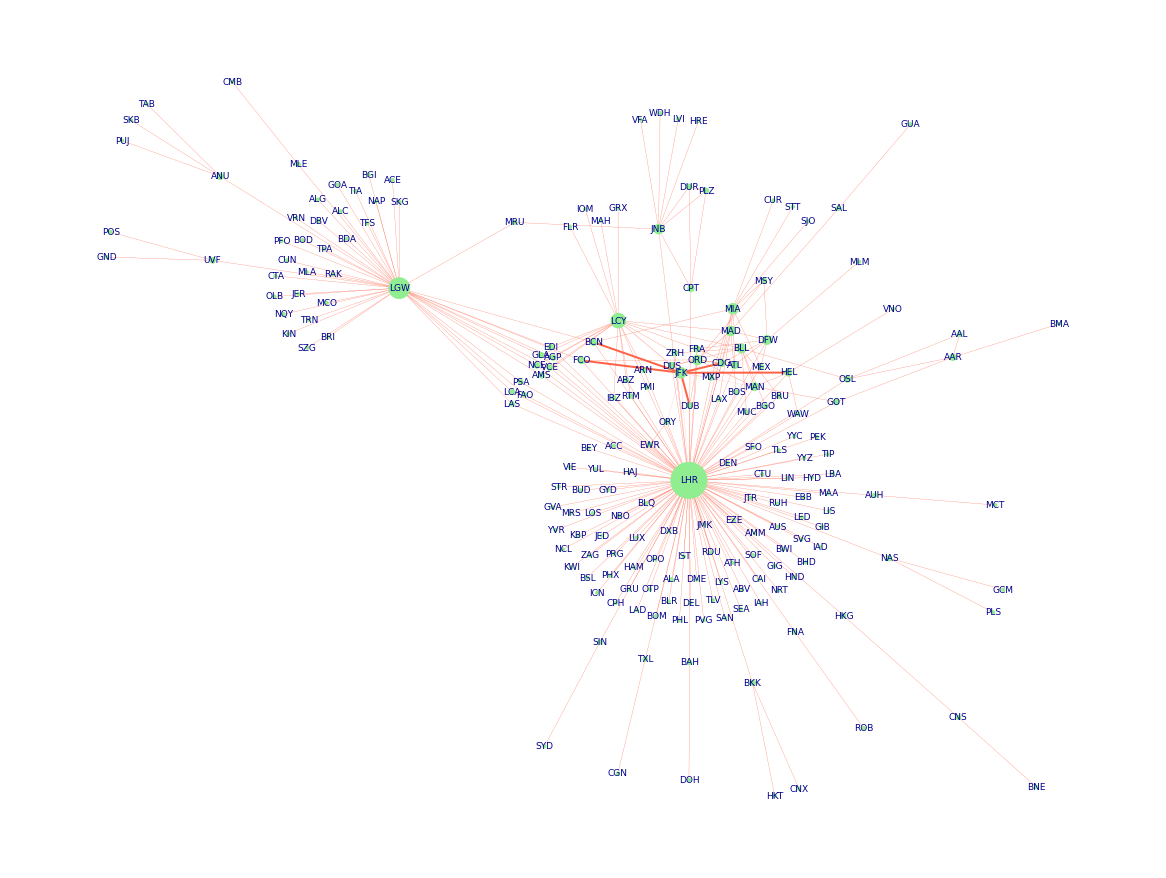

In [50]:
plt.rcParams['figure.figsize'] = (16.0, 12.0)
node_sizes= [degree[1]*10 for degree in british_routes.degree]
weights= [2 if edge[1]== "JFK" else 0.25 for edge in british_routes.edges]
edge_color= ["lightpink" if edge[0]== "JFK" else "tomato" for edge in british_routes.edges]
pos = nx.spring_layout(british_routes, iterations=200,
                      seed = 42)
nx.draw(british_routes, pos, cmap=plt.get_cmap('viridis'), 
        with_labels=True,
        node_color= "lightgreen",
        node_size= node_sizes, 
        edge_color= edge_color, 
        width= weights,
        font_size=9,
        font_color= "darkblue")
plt.show()

[Text(130.4, 0, '130'),
 Text(43.4, 0, '43'),
 Text(21.4, 0, '21'),
 Text(11.4, 0, '11'),
 Text(9.4, 0, '9'),
 Text(8.4, 0, '8'),
 Text(6.4, 0, '6'),
 Text(5.4, 0, '5'),
 Text(4.4, 0, '4'),
 Text(3.4, 0, '3'),
 Text(2.4, 0, '2'),
 Text(1.4, 0, '1')]

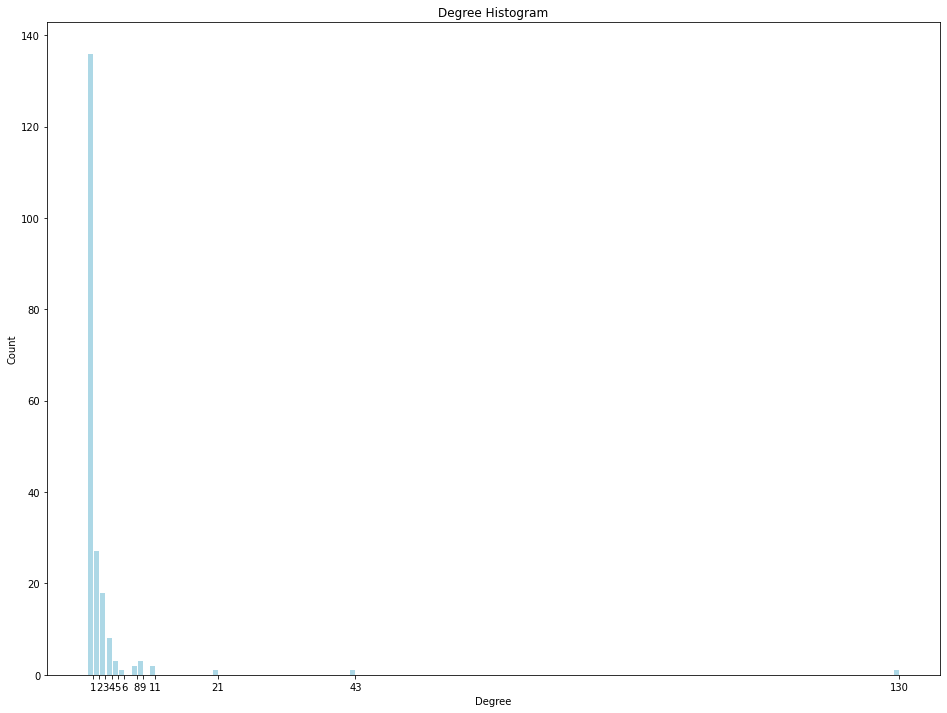

In [37]:
degree_sequence = sorted([d for n, d in british_routes.degree()], reverse=True)
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color="lightblue")

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

Text(0.5, 1.0, 'Degree distribution')

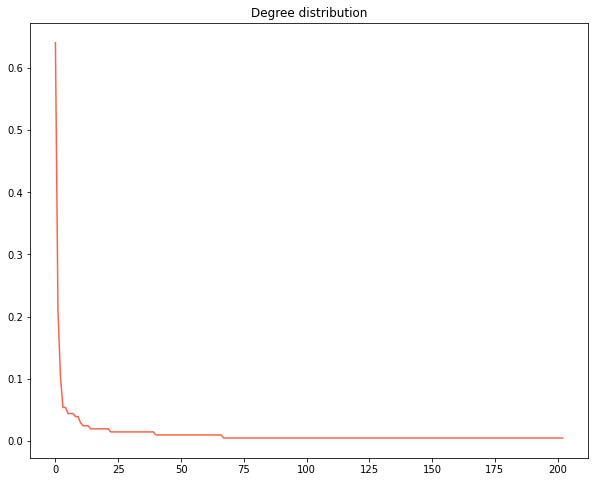

In [38]:
degree_distribution= [int(degree[1]) for degree in british_routes.degree]
degree_distribution= [val/ len(degree_distribution) for val in degree_distribution]
degree_distribution.sort(reverse= True)
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.plot(degree_distribution, color= "tomato")
plt.title("Degree distribution")

[Text(7.4, 0, '7'),
 Text(6.4, 0, '6'),
 Text(5.4, 0, '5'),
 Text(4.4, 0, '4'),
 Text(3.4, 0, '3'),
 Text(2.4, 0, '2'),
 Text(1.4, 0, '1'),
 Text(0.4, 0, '0')]

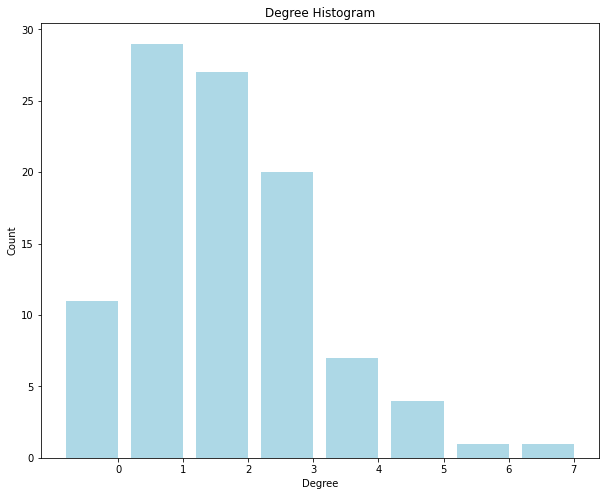

In [44]:
random_graph = nx.gnp_random_graph(100, 0.02)

degree_sequence = sorted([d for n, d in random_graph.degree()], reverse=True)
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color="lightblue")

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

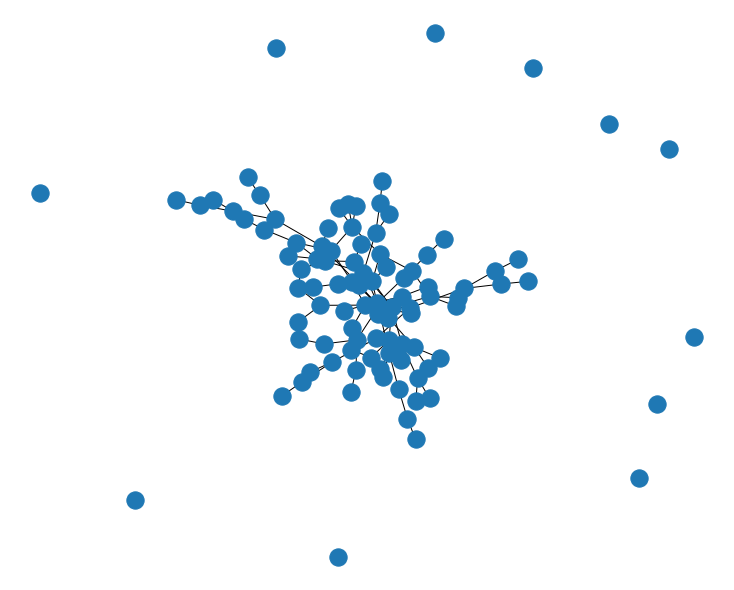

In [47]:
nx.draw(random_graph)
plt.show()

Text(0.5, 1.0, 'Degree distribution')

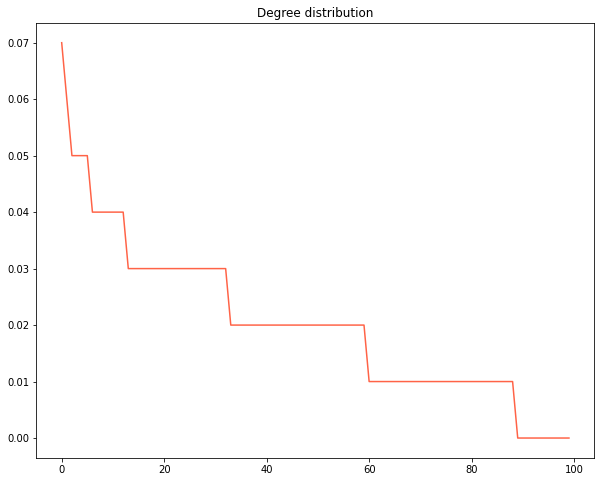

In [45]:
degree_distribution= [int(degree[1]) for degree in random_graph.degree]
degree_distribution= [val/ len(degree_distribution) for val in degree_distribution]
degree_distribution.sort(reverse= True)
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.plot(degree_distribution, color= "tomato")
plt.title("Degree distribution")

## Influence Measures

### Degree Centrality

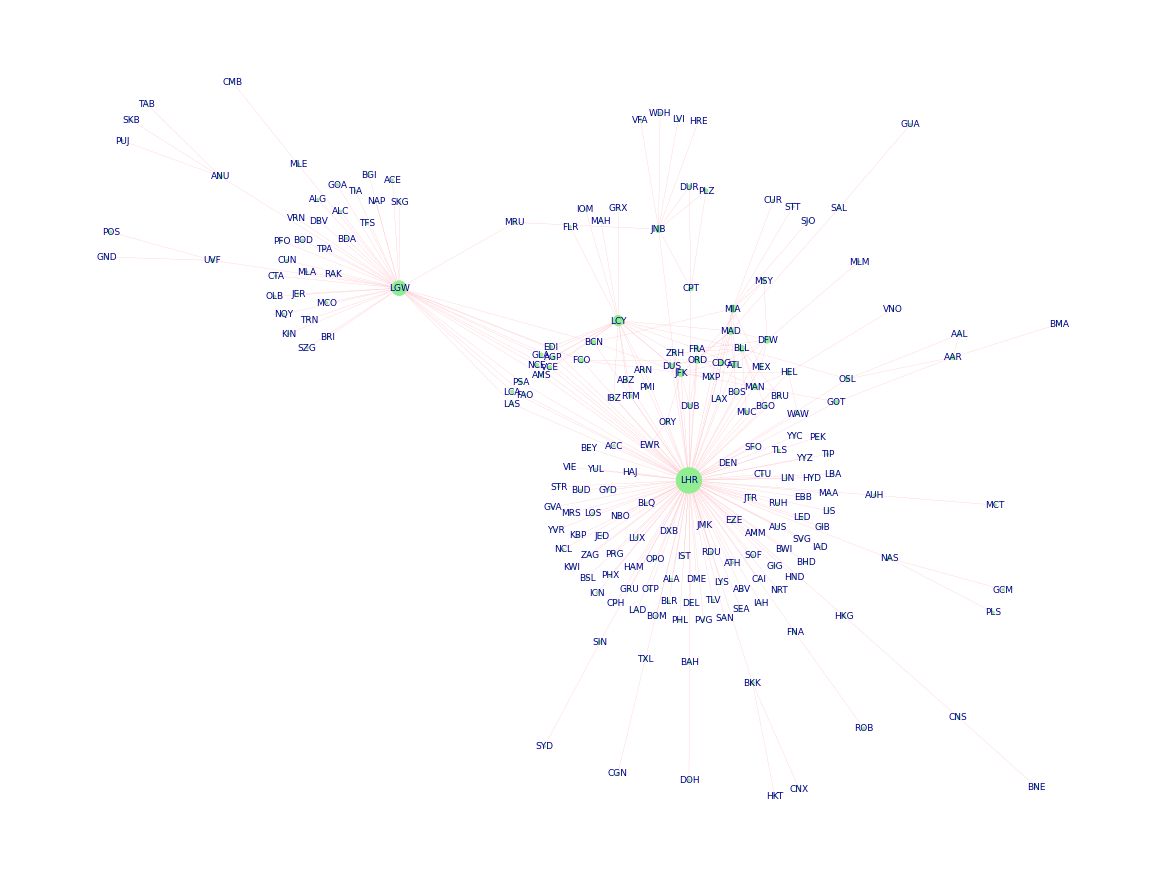

In [51]:
plt.rcParams['figure.figsize'] = (16.0, 12.0)
degree_centrality= nx.degree_centrality(british_routes)
node_sizes= list(degree_centrality.values())
node_sizes= [val*1000 for val in node_sizes]
pos = nx.spring_layout(british_routes, iterations=200,
                      seed = 42)
nx.draw(british_routes, pos, cmap=plt.get_cmap('viridis'), 
        with_labels=True,
        node_color= "lightgreen",
        node_size= node_sizes, 
        edge_color= "lightpink", 
        width= 0.25,
        font_size=9,
        font_color= "darkblue")
plt.show()

### Betweenness Centrality

In [52]:
betweenness_centrality= nx.betweenness_centrality(british_routes, seed= 42)
betweenness_centrality= dict(sorted(betweenness_centrality.items(), 
            key=operator.itemgetter(1),
            reverse=True))

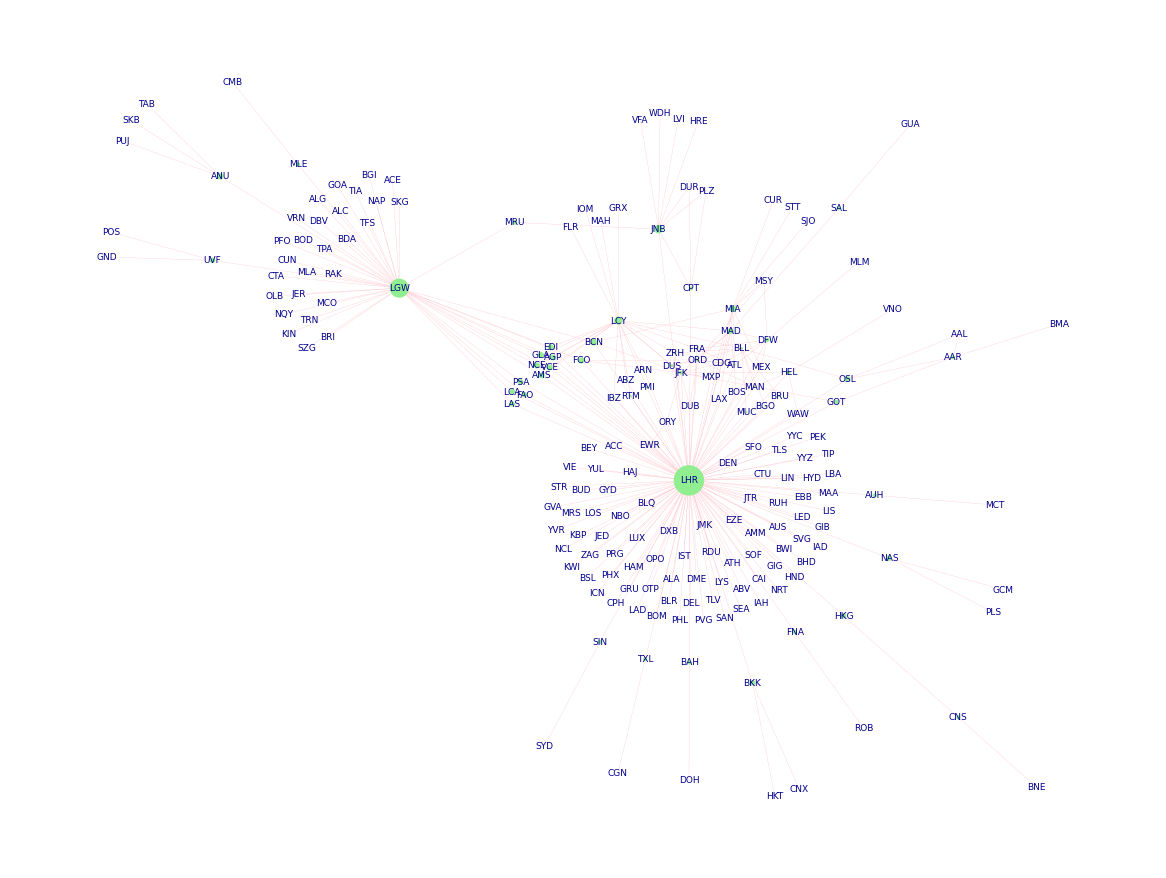

In [53]:
betweenness_centrality= nx.betweenness_centrality(british_routes, seed= 42)

plt.rcParams['figure.figsize'] = (16.0, 12.0)
node_sizes= list(betweenness_centrality.values())
node_sizes= [val* 1000 for val in node_sizes]
pos = nx.spring_layout(british_routes, iterations=200,
                      seed = 42)
nx.draw(british_routes, pos, cmap=plt.get_cmap('viridis'), 
        with_labels=True,
        node_color= "lightgreen",
        node_size= node_sizes, 
        edge_color= "lightpink", 
        width= 0.25,
        font_size=9,
        font_color= "darkblue")
plt.show()

### Closeness Centrality

In [54]:
closeness_centrality= nx.closeness_centrality(british_routes)
closeness_centrality= dict(sorted(closeness_centrality.items(), 
            key=operator.itemgetter(1),
            reverse=True))

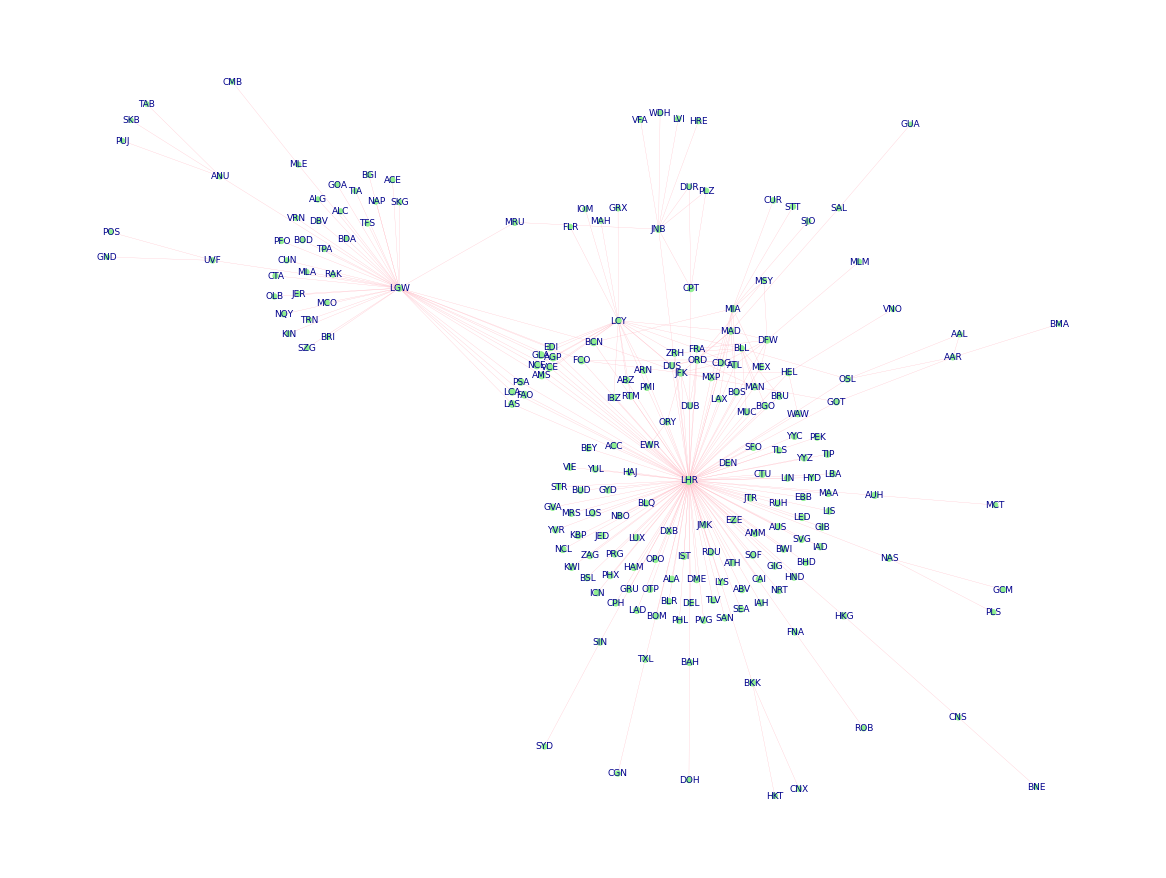

In [55]:
plt.rcParams['figure.figsize'] = (16.0, 12.0)
closeness_centrality= nx.closeness_centrality(british_routes)
node_sizes= list(closeness_centrality.values())
node_sizes= [val*100 for val in node_sizes]
pos = nx.spring_layout(british_routes, iterations=200,
                      seed = 42)
nx.draw(british_routes, pos, cmap=plt.get_cmap('viridis'), 
        with_labels=True,
        node_color= "lightgreen",
        node_size= node_sizes, 
        edge_color= "lightpink", 
        width= 0.25,
        font_size=9,
        font_color= "darkblue")
plt.show()

### Eigenvector Centrality

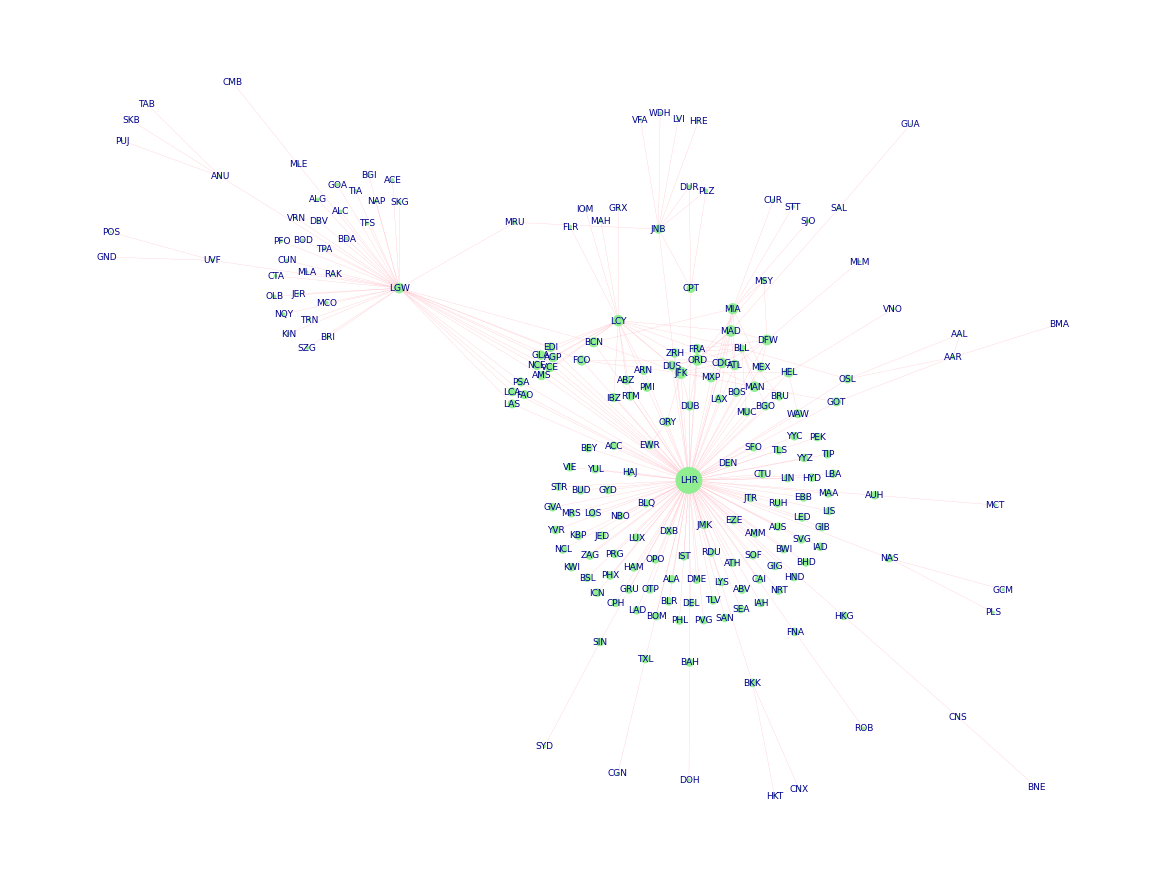

In [56]:
plt.rcParams['figure.figsize'] = (16.0, 12.0)
eigenvector_centrality= nx.eigenvector_centrality(british_routes)
node_sizes= list(eigenvector_centrality.values())
node_sizes= [val*1000 for val in node_sizes]
pos = nx.spring_layout(british_routes, iterations=200,
                      seed = 42)
nx.draw(british_routes, pos, cmap=plt.get_cmap('viridis'), 
        with_labels=True,
        node_color= "lightgreen",
        node_size= node_sizes, 
        edge_color= "lightpink", 
        width= 0.25,
        font_size=9,
        font_color= "darkblue")
plt.show()

## Graph Traversal

In [57]:
print("Shortest route from London, UK to Genoa, Italy: ", 
      nx.shortest_path(british_routes, "LHR", "GOA"))
print("Shortest route length (in terms of number of edges): ",
      nx.shortest_path_length(british_routes, "LHR", "GOA"))

Shortest route from London, UK to Genoa, Italy:  ['LHR', 'AGP', 'LGW', 'GOA']
Shortest route length (in terms of number of edges):  3


In [58]:
shortest_paths= nx.shortest_simple_paths(british_routes, "LHR", "GOA")
count= 0
for element in shortest_paths:
    if count< 10:
        print(element)
        count+= 1
    else:
        break

['LHR', 'AGP', 'LGW', 'GOA']
['LHR', 'AMS', 'LGW', 'GOA']
['LHR', 'BCN', 'LGW', 'GOA']
['LHR', 'EDI', 'LGW', 'GOA']
['LHR', 'FAO', 'LGW', 'GOA']
['LHR', 'FCO', 'LGW', 'GOA']
['LHR', 'GLA', 'LGW', 'GOA']
['LHR', 'LAS', 'LGW', 'GOA']
['LHR', 'LCA', 'LGW', 'GOA']
['LHR', 'NCE', 'LGW', 'GOA']


## Graph Clustering

In [76]:
node_colors= ["skyblue" if "LGW" in community else "maroon" 
 for community in list(nx.community.asyn_lpa_communities(british_routes, seed= 42)) for node in community]
node_sizes= [500 if "LGW" in community else 1 
 for community in list(nx.community.asyn_lpa_communities(british_routes, seed= 42)) for node in community]

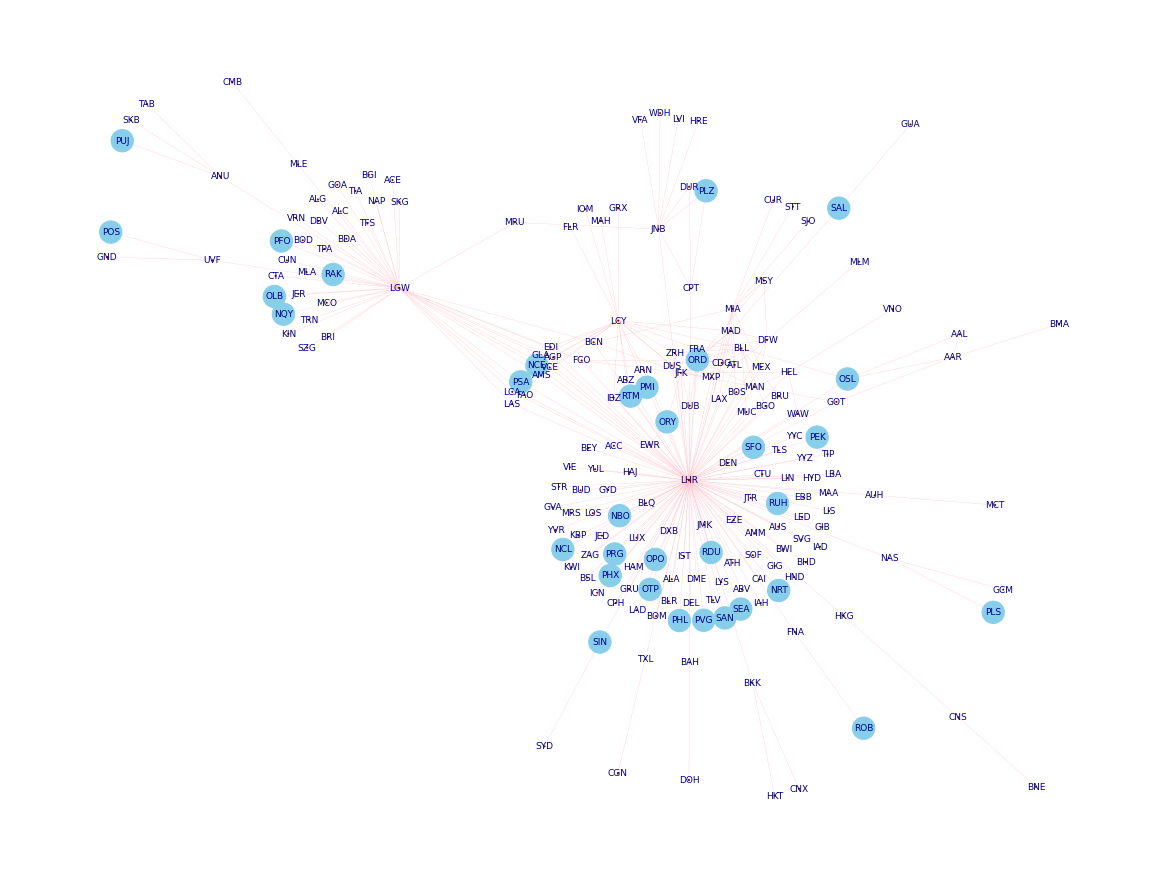

In [77]:
plt.rcParams['figure.figsize'] = (16.0, 12.0)
pos = nx.spring_layout(british_routes, iterations=200,
                      seed = 42)
nx.draw(british_routes, pos, cmap=plt.get_cmap('viridis'), 
        with_labels=True,
        node_color= node_colors,
        node_size= node_sizes, 
        edge_color= "lightpink", 
        width= 0.25,
        font_size=9,
        font_color= "darkblue")
plt.show()

In [ ]:
node_colors= ["skyblue" if "GOA" in community else "maroon" 
 for community in list(nx.community.asyn_lpa_communities(british_routes, seed= 42)) for node in community]
node_sizes= [500 if "GOA" in community else 1 
 for community in list(nx.community.asyn_lpa_communities(british_routes, seed= 42)) for node in community]

In [71]:
list(nx.community.asyn_lpa_communities(british_routes, seed= 42))

[{'AAL', 'AAR', 'BMA'},
 {'ABV',
  'ABZ',
  'ACC',
  'AGP',
  'ALA',
  'AMM',
  'AMS',
  'ARN',
  'ATH',
  'ATL',
  'AUS',
  'BAH',
  'BCN',
  'BEY',
  'BGO',
  'BHD',
  'BLL',
  'BLQ',
  'BLR',
  'BOM',
  'BOS',
  'BRU',
  'BSL',
  'BUD',
  'BWI',
  'CAI',
  'CDG',
  'CPH',
  'CTU',
  'CUR',
  'DEL',
  'DEN',
  'DFW',
  'DME',
  'DOH',
  'DUB',
  'DUS',
  'DXB',
  'EBB',
  'EDI',
  'EWR',
  'EZE',
  'FCO',
  'FLR',
  'FRA',
  'GIB',
  'GIG',
  'GLA',
  'GOT',
  'GRU',
  'GRX',
  'GVA',
  'GYD',
  'HAJ',
  'HAM',
  'HEL',
  'HKG',
  'HND',
  'HYD',
  'IAD',
  'IAH',
  'IBZ',
  'ICN',
  'IOM',
  'IST',
  'JED',
  'JFK',
  'JMK',
  'JTR',
  'KBP',
  'KWI',
  'LAD',
  'LAX',
  'LBA',
  'LCY',
  'LED',
  'LHR',
  'LIN',
  'LIS',
  'LOS',
  'LUX',
  'LYS',
  'MAA',
  'MAD',
  'MAH',
  'MAN',
  'MEX',
  'MIA',
  'MLM',
  'MRS',
  'MSY',
  'MUC',
  'MXP',
  'NBO',
  'NCE',
  'NCL',
  'NRT',
  'OPO',
  'ORD',
  'ORY',
  'OSL',
  'OTP',
  'PEK',
  'PHL',
  'PHX',
  'PMI',
  'PRG',
  'PVG',
  'R

### Directed Graphs

In [77]:
directed_routes= nx.DiGraph(british_routes.edges)
directed_routes.is_directed()

In [148]:
british_indegree= DataFrame(directed_routes.in_degree,
                            columns= ["Airport", "In-degree"])
british_indegree.shape

(203, 2)

In [84]:
british_indegree[british_indegree["In-degree"]> 2].shape

(203, 2)

In [85]:
british_outdegree= DataFrame(directed_routes.out_degree, columns= ["Airport", "Out-degree"])

In [86]:
british_outdegree[british_outdegree["Out-degree"]> 2].head(4)

,Airport,Out-degree
1,AAR,3
6,LHR,53
8,LCY,7
11,LGW,20


In [87]:
nx.diameter(british_routes)

7

In [88]:
nx.transitivity(british_routes)

0.01357329579730545

In [101]:
british_indegree

,Airport,In-degree
0,AAL,0
1,AAR,1
2,OSL,4
3,BMA,1
4,GOT,1
...,...,...
198,STT,1
199,SJO,1
200,PLS,1
201,POS,0
